In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

# Results

In [3]:
main_root = os.getcwd()

In [4]:
root = main_root + '\\GeneSets\\1StepKernel\\Results'
random_root = main_root + '\\GeneSets\\1StepKernel_RandomAMR_1\\Results'
random_root2 = main_root + '\\GeneSets\\1StepKernel_RandomAMR_2\\Results'
random_root3 = main_root + '\\GeneSets\\1StepKernel_RandomAMR_3\\Results'

In [5]:
samples = len(os.listdir(root))

In [7]:
result_example = root + '/model_gset_0/all/f1.tab'

with open(result_example, 'r') as result:
    antibiotics = []
    for line in result:
        antibiotics.append(line.split('\t')[0])

results = pd.DataFrame(index = antibiotics, columns = range(samples))
results_random = pd.DataFrame(index = antibiotics, columns = range(samples))
results_random2 = pd.DataFrame(index = antibiotics, columns = range(samples))
results_random3 = pd.DataFrame(index = antibiotics, columns = range(samples))

In [8]:
for i in range(samples): #top
    result_file = root + f'/model_gset_{i}/all/f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)
    result_file = random_root + f'/model_gset_{i}/all/f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results_random.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)
    result_file = random_root2 + f'/model_gset_{i}/all/f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results_random2.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)
    result_file = random_root3 + f'/model_gset_{i}/all/f1.tab'
    with open(result_file, 'r') as result:
        for line in result:
            values = line.split('\t')
            results_random3.loc[values[0]][i] = np.around(float(values[1]), decimals = 3)

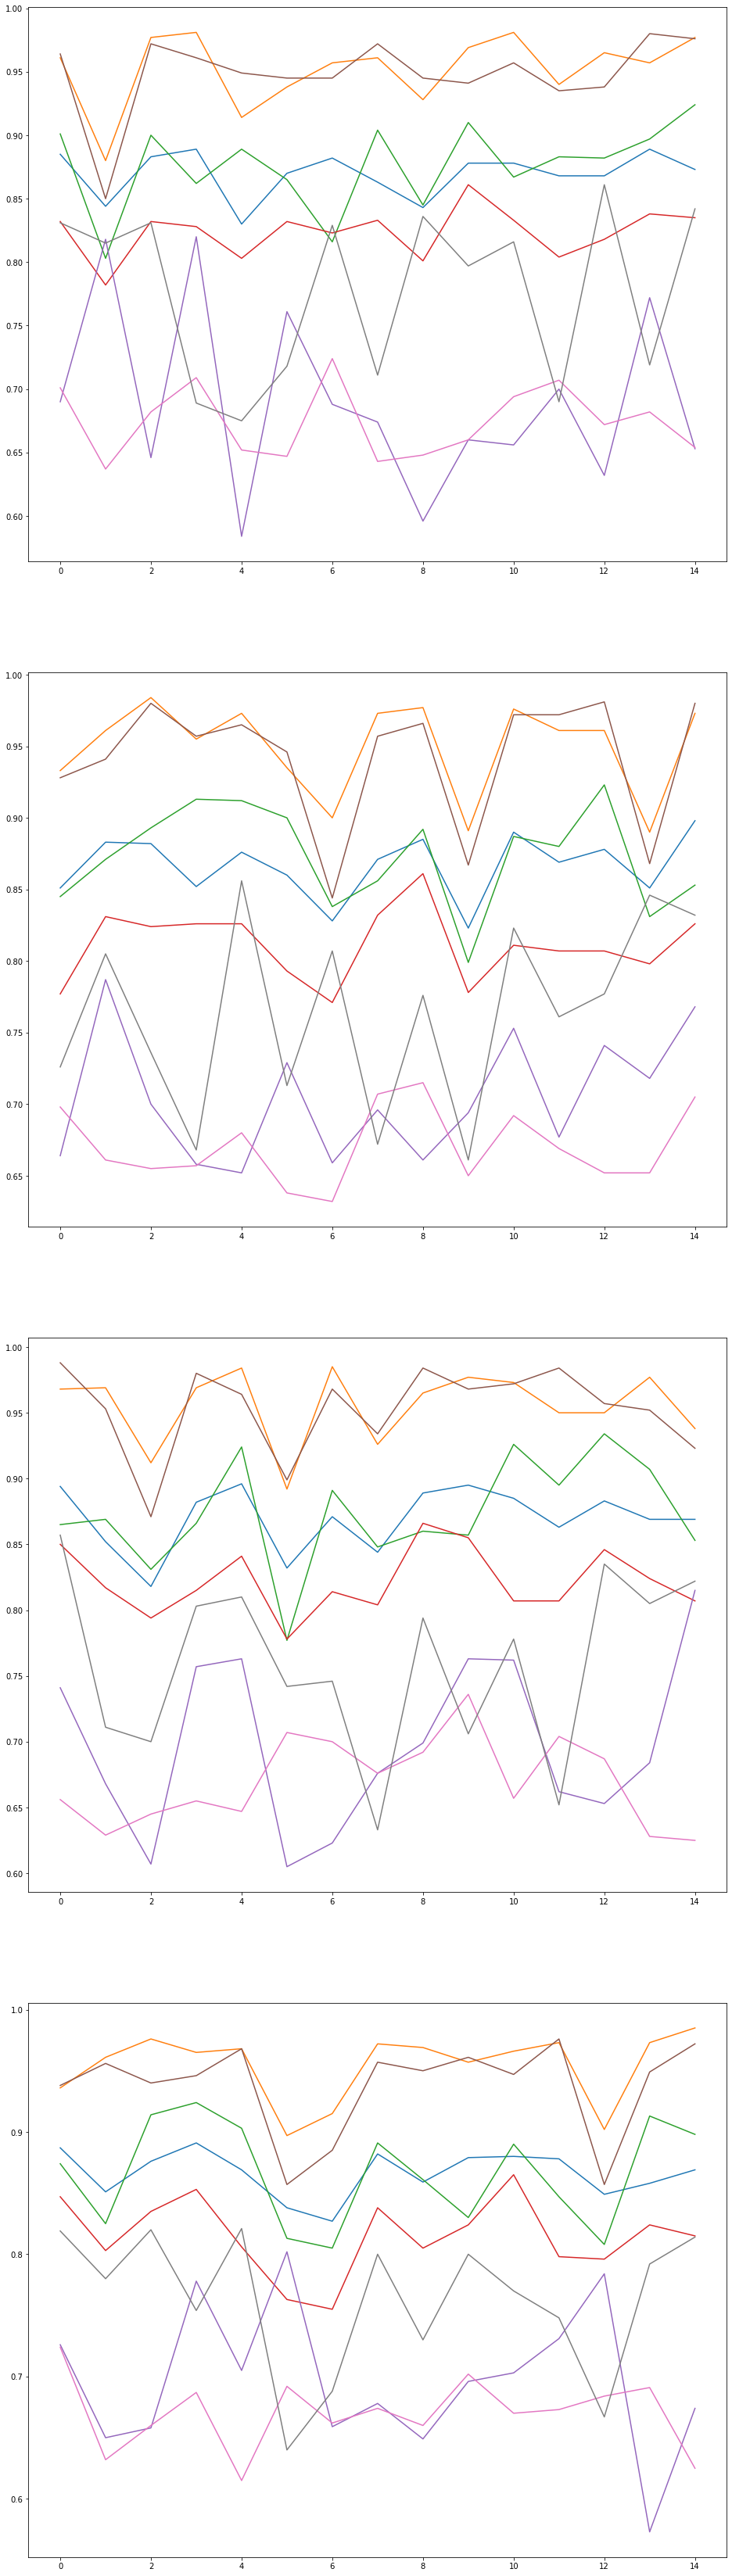

In [9]:
figure, axis = plt.subplots(4, figsize=(16, 60))

axis[0].plot(results.T)
axis[1].plot(results_random.T)
axis[2].plot(results_random2.T)
axis[3].plot(results_random3.T)

plt.show()

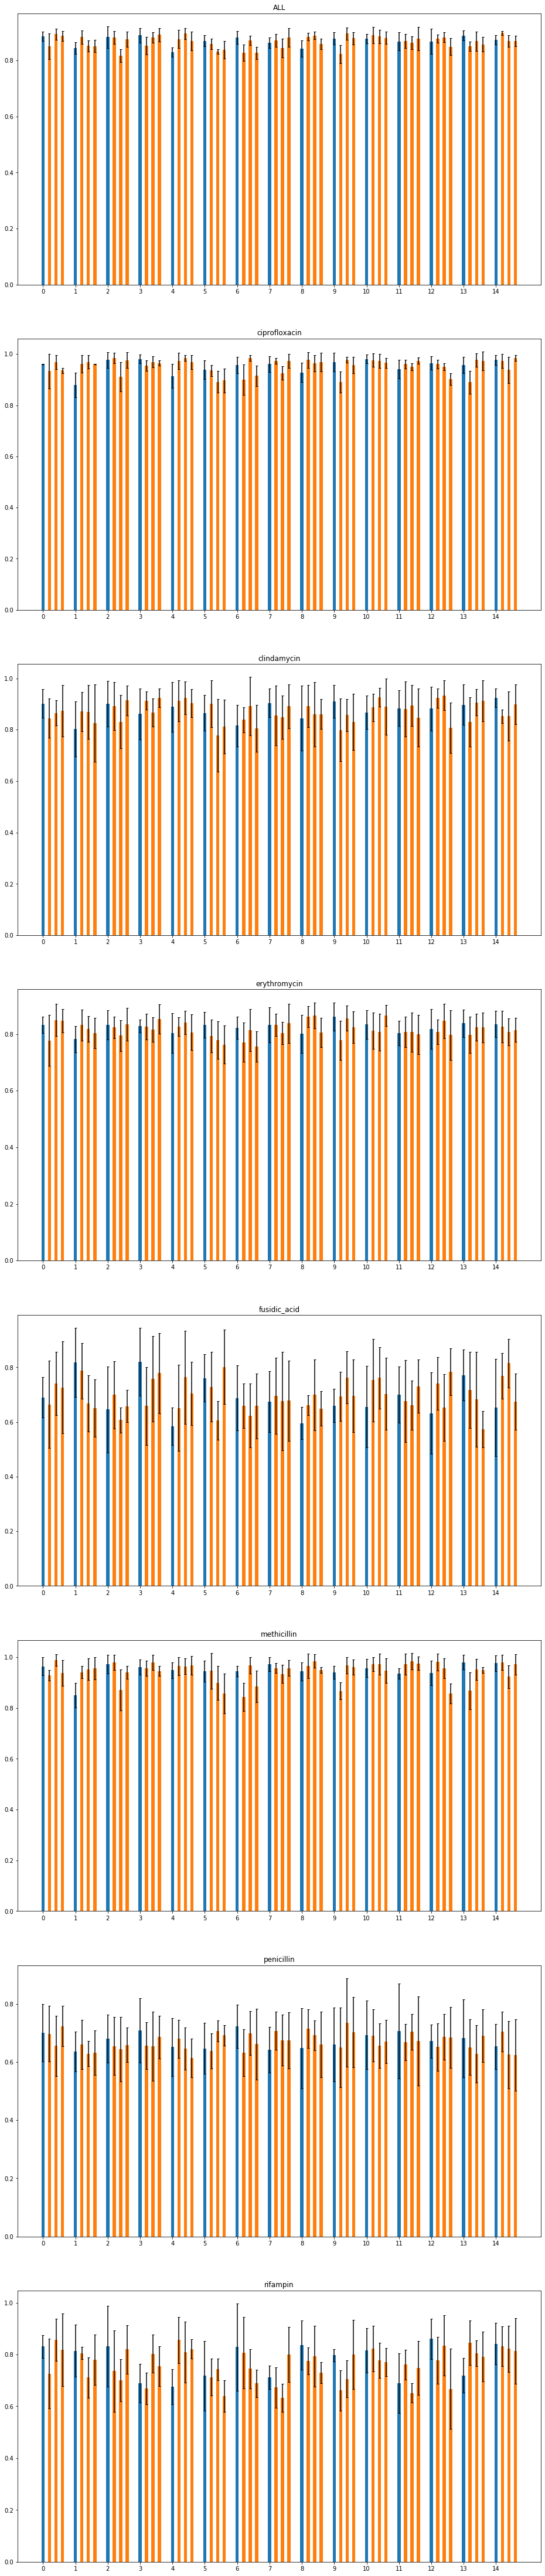

In [11]:
figure, axis = plt.subplots(len(antibiotics), figsize=(16, 80))
for r in range(samples):
    
    result_file = root + f'/model_gset_{r}/all/f1.tab'
    result_file_random = random_root + f'/model_gset_{r}/all/f1.tab'
    result_file_random2 = random_root2 + f'/model_gset_{r}/all/f1.tab'
    result_file_random3 = random_root3 + f'/model_gset_{r}/all/f1.tab'
    
    with open(result_file, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:blue', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
    with open(result_file_random, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r+0.20, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
    with open(result_file_random2, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r+0.40, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
    
    with open(result_file_random3, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r+0.60, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
for i in range(len(antibiotics)):
    axis[i].set_title(antibiotics[i])
    axis[i].set_xticks(range(samples))

plt.show()

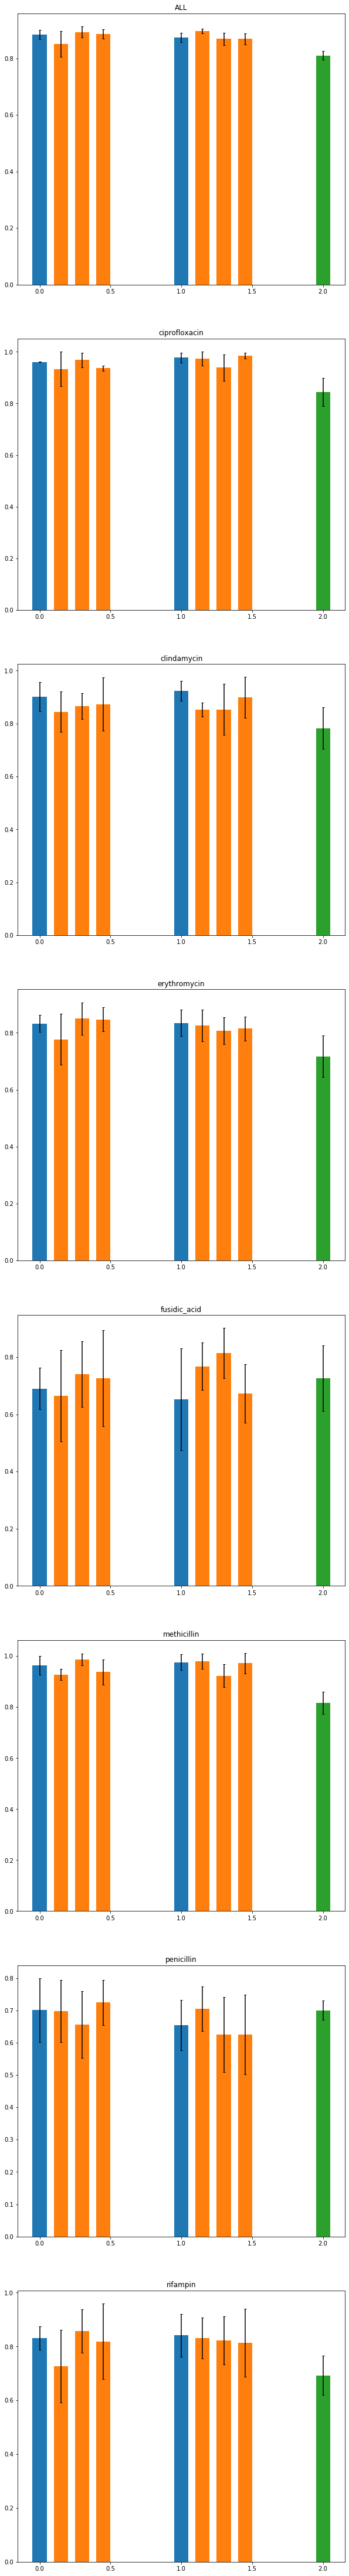

In [12]:
figure, axis = plt.subplots(len(antibiotics), figsize=(10, 80))
for r in [0, samples-1]:
    
    result_file = root + f'/model_gset_{r}/all/f1.tab'
    result_file_random = random_root + f'/model_gset_{r}/all/f1.tab'
    result_file_random2 = random_root2 + f'/model_gset_{r}/all/f1.tab'
    result_file_random3 = random_root3 + f'/model_gset_{r}/all/f1.tab'
    
    with open(result_file, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r/(samples-1), float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:blue', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
    with open(result_file_random, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r/(samples-1) +0.15, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
    with open(result_file_random2, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r/(samples-1) +0.30, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
    
    with open(result_file_random3, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(r/(samples-1) +0.45, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:orange', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            

result_file_paper = main_root + '\\PaperResults\\model_gset_25_0\\all\\f1.tab'

with open(result_file_paper, 'r') as result:
        k = 0
        for line in result:
            values = line.split('\t')
            axis[k].bar(2, float(values[1]), yerr = np.array([[float(values[1])-float(values[2])], [float(values[3])-float(values[1])]]), 
                        color = 'tab:green', ecolor = 'k', width = 0.1, capsize=2, align = 'center')
            k+=1
            
for i in range(len(antibiotics)):
    axis[i].set_title(antibiotics[i])
#     axis[i].set_xticks(range(samples))

plt.show()